In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [19]:
df = pd.read_csv(r"Bond-VN.csv", index_col= 0,parse_dates=True)

y = df.GGVF5Y
x = df[['GGVF1Y','CPI','FER','Baserate','FIR', 'Stockreturn','Fiscal', 'Pubdebt', 'CurrentAcc']]

In [20]:
n_state = 50
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state=n_state) 

# Decision Tree Regressor

In [21]:
decision_tree = DecisionTreeRegressor(random_state=n_state)
decision_tree.fit(x_train, y_train);

In [22]:
pred_decision_tree = decision_tree.predict(x_test)
result_decision_tree = pd.DataFrame({'Real': y_test, 'Prediction': pred_decision_tree})
result_decision_tree.sort_index(inplace=True)
result_decision_tree.head(7)

,Real,Prediction
Time,,
2007-07-01,0.075590,0.07380
2007-11-01,0.086170,0.08711
2008-03-01,0.087300,0.08560
2008-06-01,0.203330,0.19940
2008-08-01,0.164750,0.15950
2009-05-01,0.091780,0.09161
2009-09-01,0.101705,0.10108


In [23]:
result_decision_tree.to_excel('Decision_tree.xlsx')

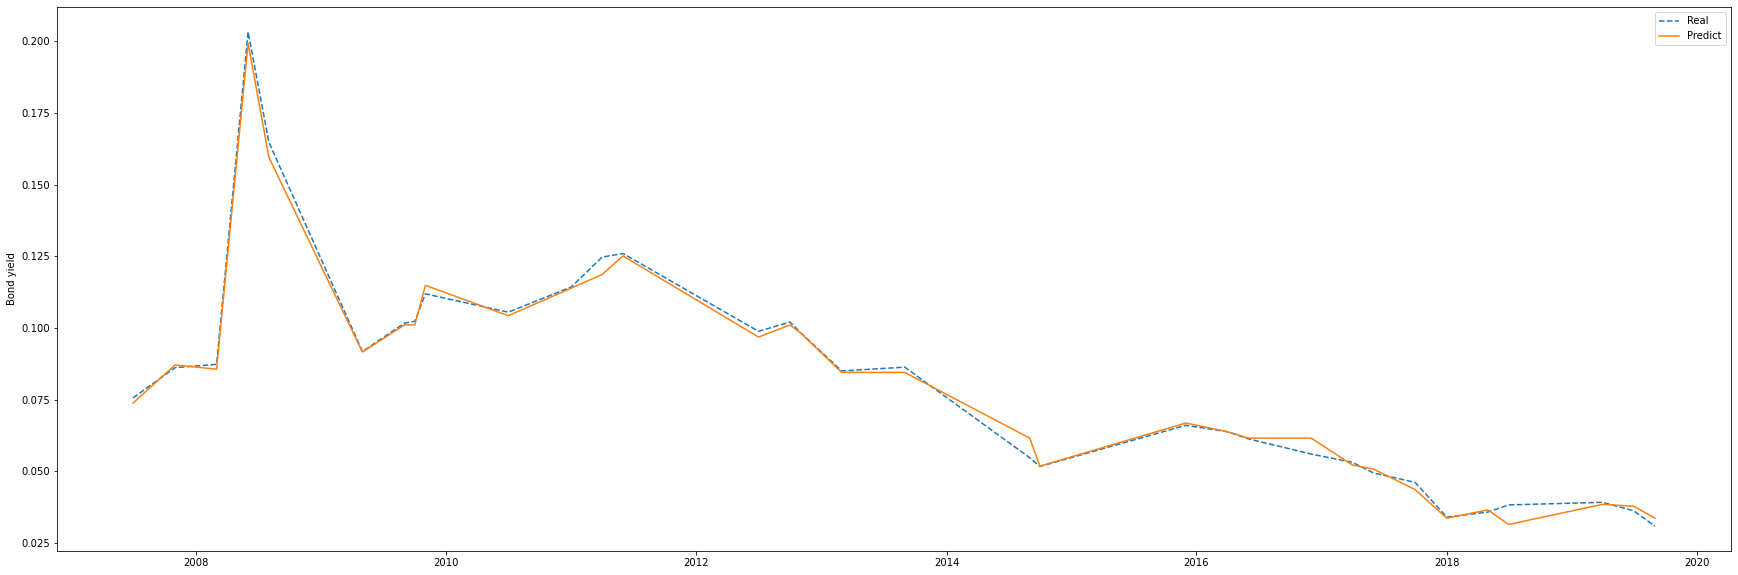

In [24]:
plt.figure(figsize=(30,10))

plt.plot(result_decision_tree.Real,'--')
plt.plot(result_decision_tree.Prediction)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')

plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(result_decision_tree.Real, result_decision_tree.Prediction))
mae = mean_absolute_error(result_decision_tree.Real, result_decision_tree.Prediction)
mape = (mean_absolute_percentage_error(result_decision_tree.Real, result_decision_tree.Prediction))*100

In [26]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.0027747586572638375
MAE  = 0.0019395454545454564
MAPE = 2.99%


# Random Forest Regressor

In [27]:
random_forest = RandomForestRegressor(random_state = n_state)
random_forest.fit(x_train, y_train);

random_forest_pred = random_forest.predict(x_test)

In [28]:
result_random_forest = pd.DataFrame({'Real': y_test, 'Prediction': random_forest_pred})
result_random_forest.sort_index(inplace=True)
result_random_forest.head(7)

,Real,Prediction
Time,,
2007-07-01,0.075590,0.073597
2007-11-01,0.086170,0.082786
2008-03-01,0.087300,0.085494
2008-06-01,0.203330,0.170783
2008-08-01,0.164750,0.171750
2009-05-01,0.091780,0.091378
2009-09-01,0.101705,0.099145


In [29]:
result_random_forest.to_excel('Ramdon_forest.xlsx')

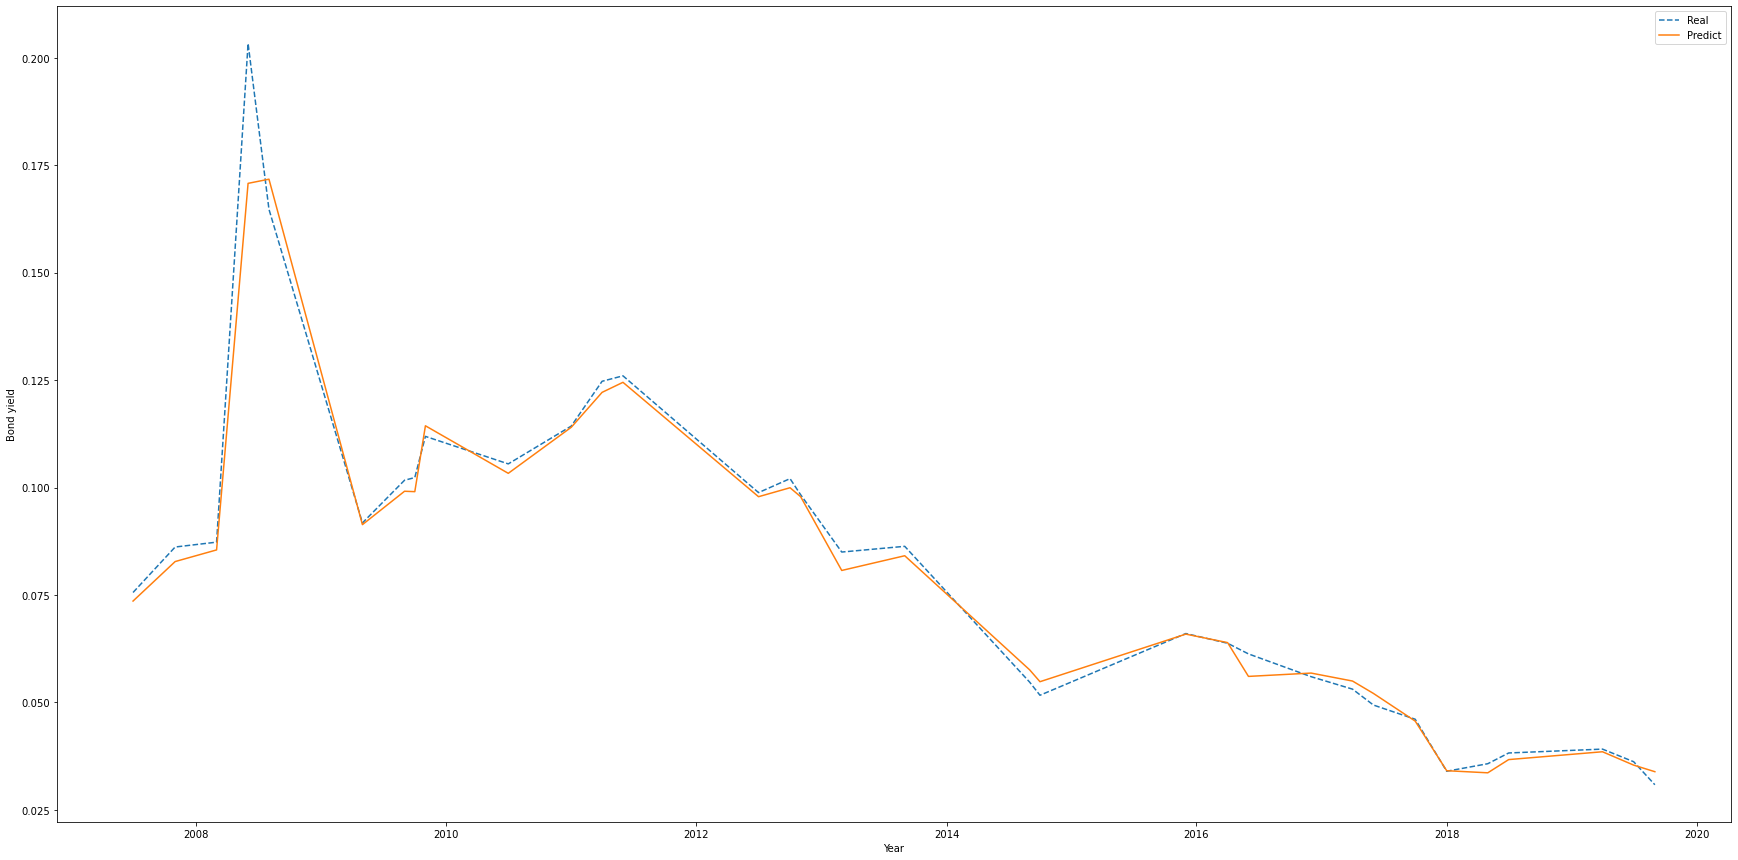

In [30]:
plt.figure(figsize=(30,15))

plt.plot(result_random_forest.Real,'--')
plt.plot(result_random_forest.Prediction)

plt.legend(['Real','Predict'])

plt.xlabel('Year')
plt.ylabel('Bond yield')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(result_random_forest.Real, result_random_forest.Prediction))
mae = mean_absolute_error(result_random_forest.Real, result_random_forest.Prediction)
mape = (mean_absolute_percentage_error(result_random_forest.Real, result_random_forest.Prediction))*100
mse = mean_squared_error(result_random_forest.Real, result_random_forest.Prediction)

In [32]:
print(f'MSE  = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


MSE  = 3.841061819333326e-05
RMSE = 0.00619763004650433
MAE  = 0.0029581151515151627
MAPE = 3.32%
